# Data Preprocessing

1. Please take a look at the data types and summary of our variables.
2. Summarize the number of unique values in each column.
3. Check at descriptive statistics for the Dataset.
4. Check the number of missing values.
5. Take care of missing data. You can decide to remove or use the imputation.
6. Find and remove duplicate variables,
7. Encode the categorical variables; you can use label encoding, one hot encoding, or...
8. Create the boxplot and show the outlier.
9. Create the histogram and check the outliers.
10. If feature scaling is needed, do it, please.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [15]:
data = pd.read_csv('ClimateData.csv')
data

,id,building_class,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
0,0,Commercial,61242.0,1942.0,16.59,0.0,56.972603,NaN,248.68
1,1,Commercial,274000.0,1955.0,16.59,0.0,56.972603,12.0,26.50
2,2,Commercial,280025.0,1951.0,16.59,0.0,56.972603,12.0,24.69
3,3,Commercial,55325.0,1980.0,16.59,0.0,56.972603,12.0,48.41
4,4,Commercial,66000.0,1985.0,16.59,0.0,56.972603,NaN,3.90
...,...,...,...,...,...,...,...,...,...
75752,75752,Commercial,20410.0,1995.0,45.03,1.4,55.147541,NaN,132.92
75753,75753,Residential,40489.0,1910.0,45.03,1.4,55.147541,NaN,39.48
75754,75754,Commercial,28072.0,1917.0,106.32,36.6,47.911202,NaN,48.40
75755,75755,Commercial,53575.0,2012.0,106.32,36.6,47.911202,NaN,592.02


<h4>Please take a look at the data types and summary of our variables. </h4>

In [16]:
data.dtypes

id                        int64
building_class           object
floor_area              float64
year_built              float64
precipitation_inches    float64
snowfall_inches         float64
avg_temp                float64
days_with_fog           float64
site_eui                float64
dtype: object

<h4>Summarize the number of unique values in each column.</h4>

In [17]:
for columns in data:
    print(columns)
    print(len(data[columns].unique()))

id
75757
building_class
2
floor_area
20433
year_built
181
precipitation_inches
171
snowfall_inches
71
avg_temp
173
days_with_fog
43
site_eui
17203


OR 

In [18]:
print(data.apply(lambda col: col.unique()))

id                      [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
building_class                                  [Commercial, Residential]
floor_area              [61242.0, 274000.0, 280025.0, 55325.0, 66000.0...
year_built              [1942.0, 1955.0, 1951.0, 1980.0, 1985.0, 1956....
precipitation_inches    [16.59, 10.43, 6.64, 8.04, 1.69, 3.28, 7.29, 3...
snowfall_inches         [0.0, 1.3, 84.8, 54.9, 27.5, 62.9, 16.0, 27.0,...
avg_temp                [56.97260274, 64.25136612, 64.18306011, 62.949...
days_with_fog           [nan, 12.0, 89.0, 88.0, 90.0, 104.0, 113.0, 18...
site_eui                [248.68, 26.5, 24.69, 48.41, 3.9, 6.6, 12.82, ...
dtype: object


Here, we can remove unnessary variables from the dataset, varibales which are unnecessray and contains many null values.
'id' and 'days_with_fog'

In [19]:
col_to_drop = ['id', 'days_with_fog']
data = data.drop(col_to_drop, axis=1)

<h4>Check at descriptive statistics for the Dataset.</h4>

In [20]:
data.describe()

,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,site_eui
count,7.575700e+04,73920.000000,75757.000000,75757.000000,75757.000000,75757.000000
mean,1.659839e+05,1952.306764,42.430651,29.136379,56.176705,82.584707
std,2.468758e+05,37.053619,10.592205,17.810894,2.241940,58.255413
min,9.430000e+02,0.000000,0.000000,0.000000,44.512329,1.000000
25%,6.237900e+04,1927.000000,39.350000,9.600000,55.147541,54.530000
50%,9.136700e+04,1951.000000,42.170000,31.600000,56.835616,75.290000
75%,1.660000e+05,1977.000000,46.320000,49.100000,57.215847,97.280000
max,6.385382e+06,2015.000000,107.690000,127.300000,77.245205,997.870000


<h4>Check the number of missing values.</h4>

In [21]:
data.isna()

,building_class,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,site_eui
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
75752,False,False,False,False,False,False,False
75753,False,False,False,False,False,False,False
75754,False,False,False,False,False,False,False
75755,False,False,False,False,False,False,False


In [22]:
data.isna().sum()

building_class             0
floor_area                 0
year_built              1837
precipitation_inches       0
snowfall_inches            0
avg_temp                   0
site_eui                   0
dtype: int64

<h4>Take care of missing data. You can decide to remove or use the imputation.</h4>

As, Year_built feature has few null values compare to overall dataset. hence, dropping the null values

In [23]:
data.dropna()

,building_class,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,site_eui
0,Commercial,61242.0,1942.0,16.59,0.0,56.972603,248.68
1,Commercial,274000.0,1955.0,16.59,0.0,56.972603,26.50
2,Commercial,280025.0,1951.0,16.59,0.0,56.972603,24.69
3,Commercial,55325.0,1980.0,16.59,0.0,56.972603,48.41
4,Commercial,66000.0,1985.0,16.59,0.0,56.972603,3.90
...,...,...,...,...,...,...,...
75752,Commercial,20410.0,1995.0,45.03,1.4,55.147541,132.92
75753,Residential,40489.0,1910.0,45.03,1.4,55.147541,39.48
75754,Commercial,28072.0,1917.0,106.32,36.6,47.911202,48.40
75755,Commercial,53575.0,2012.0,106.32,36.6,47.911202,592.02


<h4>Find and remove duplicate variables</h4>

In [25]:
duplicates = data[data.duplicated()]

No duplicate rows

There is a categorical variable called 'building_class' . let us encode that varibale into label as Residential: 0 and commercial: 1

In [111]:
building_class_mapping = {'Residential': 0, 'Commercial':1}
data['building_class'] = data.building_class.map(building_class_mapping)

In [112]:
data

,building_class,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,site_eui
0,1,61242.0,1942.0,16.59,0.0,56.972603,248.68
1,1,274000.0,1955.0,16.59,0.0,56.972603,26.50
2,1,280025.0,1951.0,16.59,0.0,56.972603,24.69
3,1,55325.0,1980.0,16.59,0.0,56.972603,48.41
4,1,66000.0,1985.0,16.59,0.0,56.972603,3.90
...,...,...,...,...,...,...,...
75752,1,20410.0,1995.0,45.03,1.4,55.147541,132.92
75753,0,40489.0,1910.0,45.03,1.4,55.147541,39.48
75754,1,28072.0,1917.0,106.32,36.6,47.911202,48.40
75755,1,53575.0,2012.0,106.32,36.6,47.911202,592.02


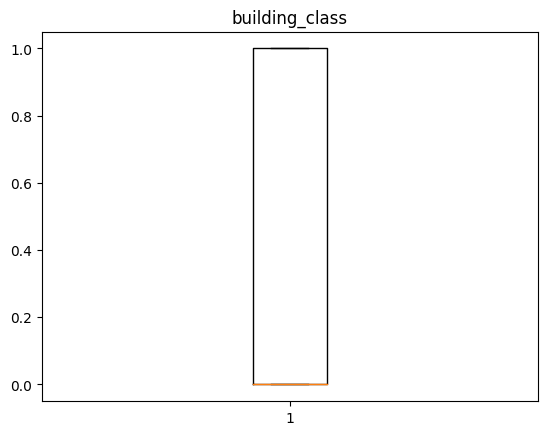

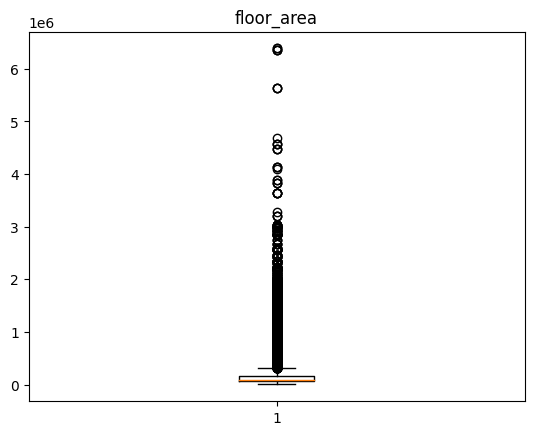

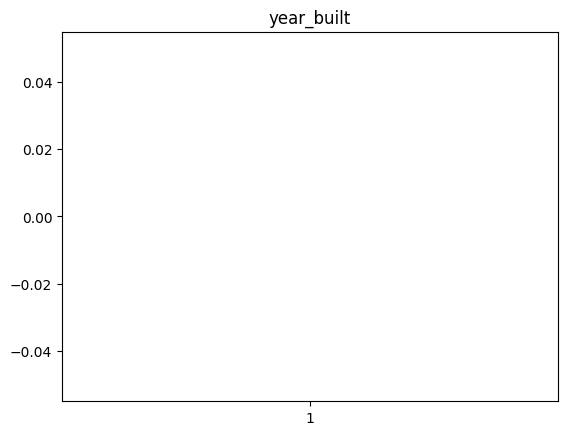

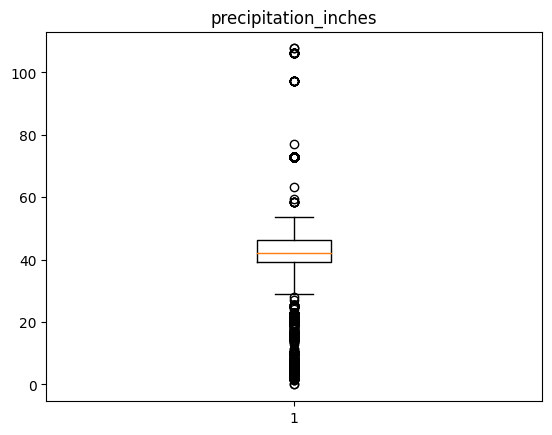

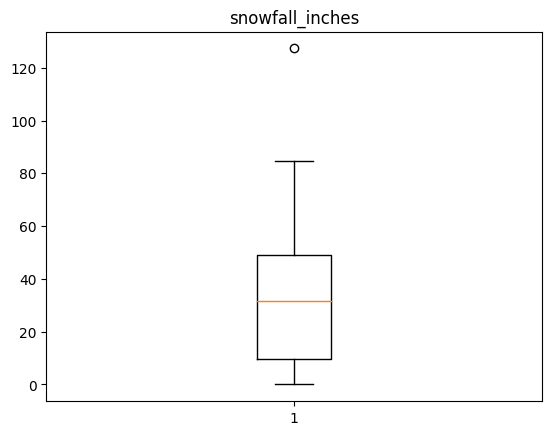

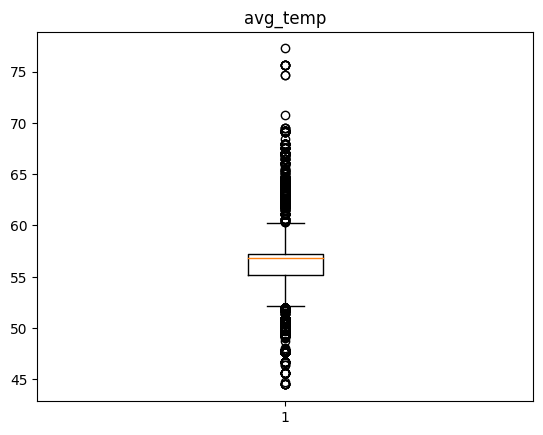

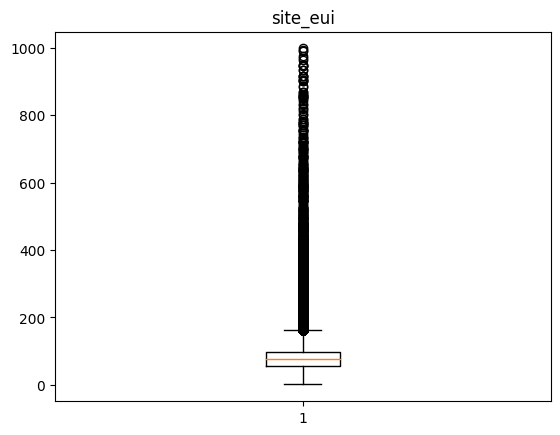

In [113]:
for column in data.columns:
    plt.boxplot(data[column])
    plt.title(column)
    plt.show()

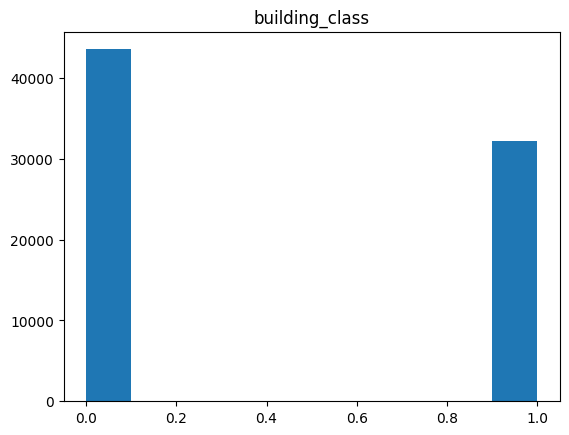

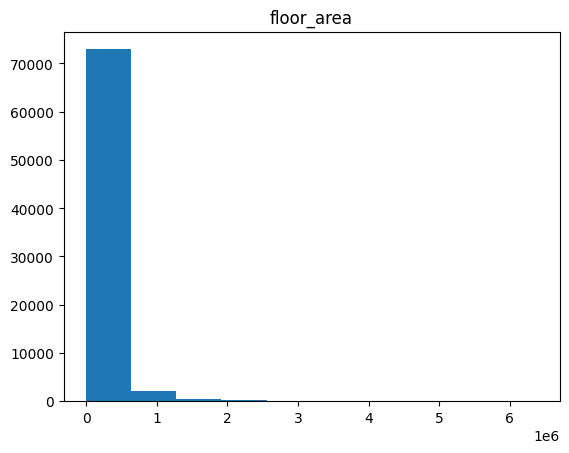

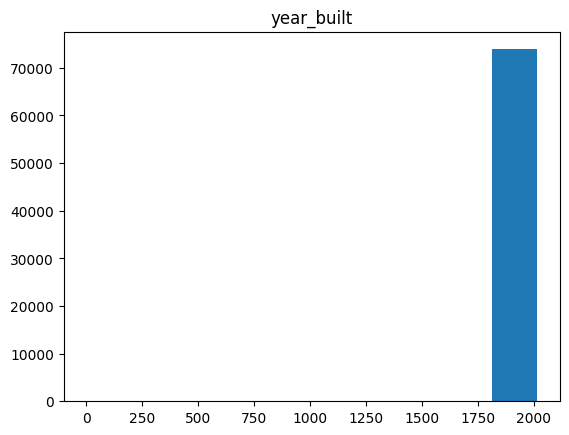

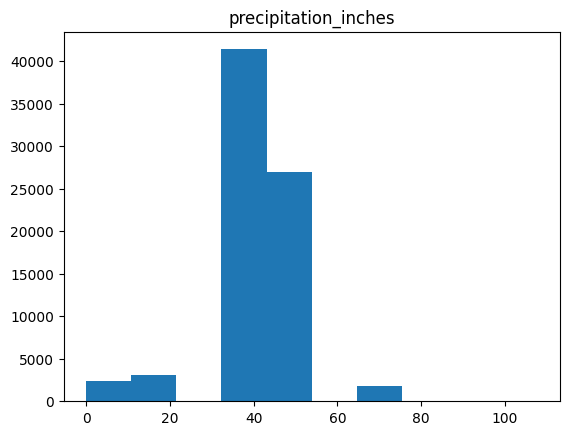

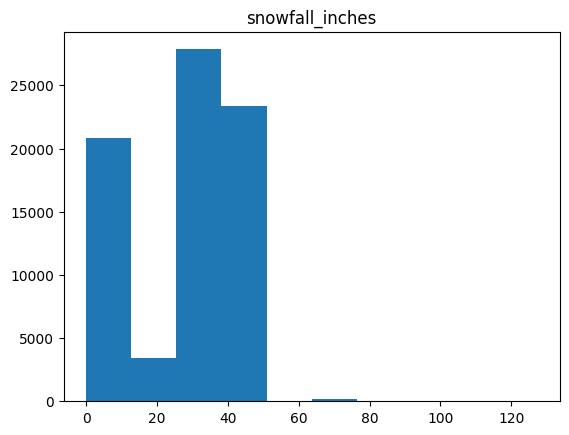

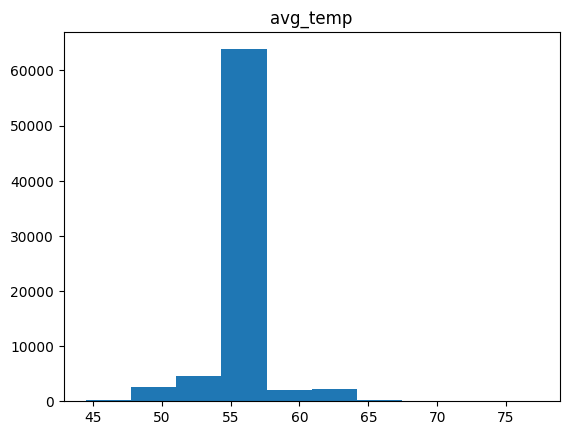

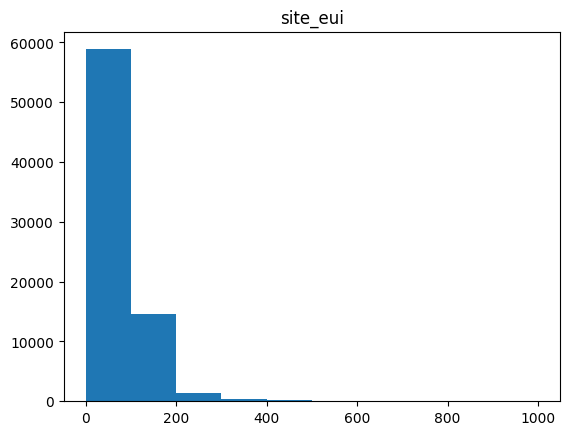

In [114]:
for column in data.columns:
    plt.hist(data[column])
    plt.title(column)
    plt.show()

In [118]:
features_to_scale = ['floor_area', 'precipitation_inches', 'avg_temp', 'site_eui']

In [119]:
scaler = MinMaxScaler()
data[features_to_scale] = scaler.fit_transform(data[features_to_scale])

In [120]:
data

,building_class,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,site_eui
0,1,0.009445,1942.0,0.154053,0.0,0.380665,0.248458
1,1,0.042769,1955.0,0.154053,0.0,0.380665,0.025580
2,1,0.043713,1951.0,0.154053,0.0,0.380665,0.023764
3,1,0.008518,1980.0,0.154053,0.0,0.380665,0.047559
4,1,0.010190,1985.0,0.154053,0.0,0.380665,0.002909
...,...,...,...,...,...,...,...
75752,1,0.003049,1995.0,0.418145,1.4,0.324909,0.132334
75753,0,0.006194,1910.0,0.418145,1.4,0.324909,0.038601
75754,1,0.004249,1917.0,0.987278,36.6,0.103837,0.047549
75755,1,0.008244,2012.0,0.987278,36.6,0.103837,0.592876
